#

In [73]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as py
import seaborn as sb
from keras.api._v2.keras import estimator

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mutual_info_score, mean_squared_error
import shap


In [2]:
train_set = pd.read_csv('9961_14084_bundle_archive/Train.csv')
target = train_set['Item_Outlet_Sales']
train_set.drop(['Item_Outlet_Sales'], axis=1, inplace=True)

test_set = pd.read_csv('9961_14084_bundle_archive/Test.csv')

In [3]:
train_set.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB


In [5]:
pd.DataFrame(np.array([train_set.isnull().sum(), (train_set.isnull().sum() / np.shape(train_set)[0]) * 100]).T,
             index=train_set.columns, columns=['Number of Missing Values', 'Percentage']).sort_values(['Percentage'], ascending=False)

,Number of Missing Values,Percentage
Outlet_Size,2410.0,28.276428
Item_Weight,1463.0,17.165317
Item_Identifier,0.0,0.000000
Item_Fat_Content,0.0,0.000000
Item_Visibility,0.0,0.000000
Item_Type,0.0,0.000000
Item_MRP,0.0,0.000000
Outlet_Identifier,0.0,0.000000
Outlet_Establishment_Year,0.0,0.000000
Outlet_Location_Type,0.0,0.000000


In [6]:
train_set.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN


<AxesSubplot: xlabel='Item_Weight', ylabel='Density'>

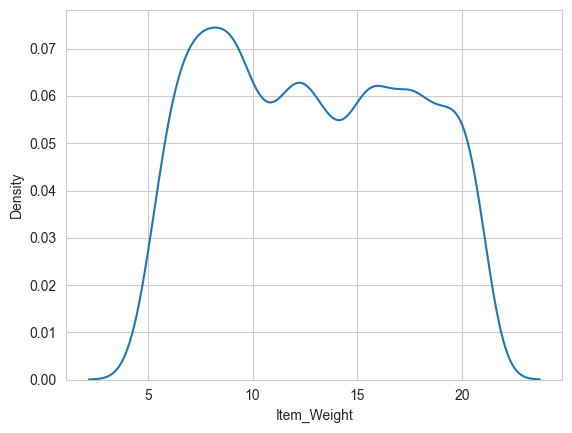

In [7]:
sb.kdeplot(x=train_set.Item_Weight)

<AxesSubplot: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

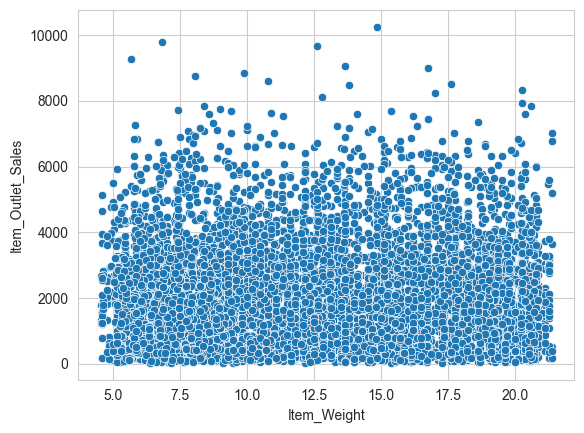

In [8]:
sb.scatterplot(x=train_set.Item_Weight, y=target)

In [9]:
train_set.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [51]:
train_set.Item_Fat_Content.replace(['LF', 'low fat', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace=True)

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='count'>

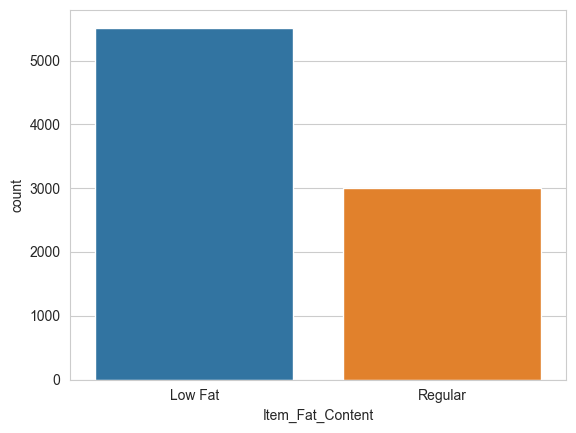

In [11]:
sb.countplot(x=train_set.Item_Fat_Content)

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

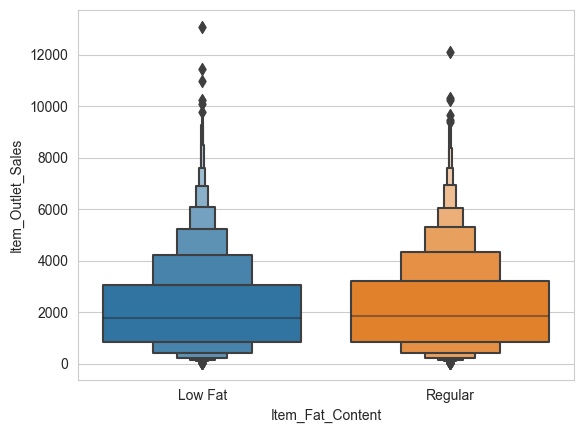

In [12]:
sb.boxenplot(x=train_set.Item_Fat_Content, y=target)

From above, **Item Sale** distribution based on **Item Fat Content** values is the same.
Can't predict the **Item Sale** based on **Item Fat Content**, need to other features.


<AxesSubplot: xlabel='Item_Visibility', ylabel='Density'>

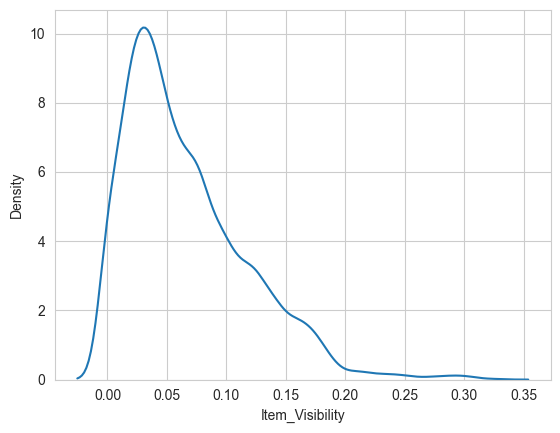

In [13]:
sb.kdeplot(x=train_set.Item_Visibility)

<AxesSubplot: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

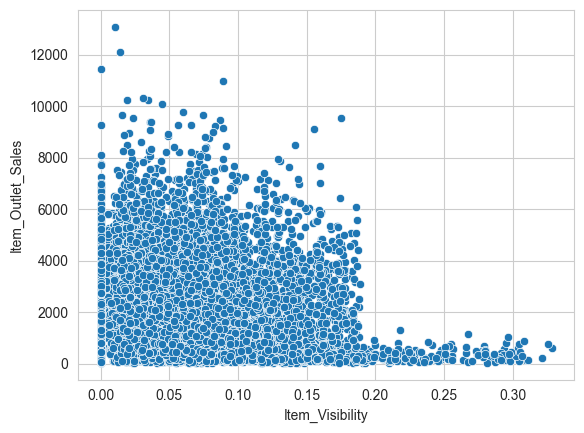

In [14]:
sb.scatterplot(x=train_set.Item_Visibility, y=target)

In [15]:
train_set.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

<AxesSubplot: xlabel='Item_Type', ylabel='count'>

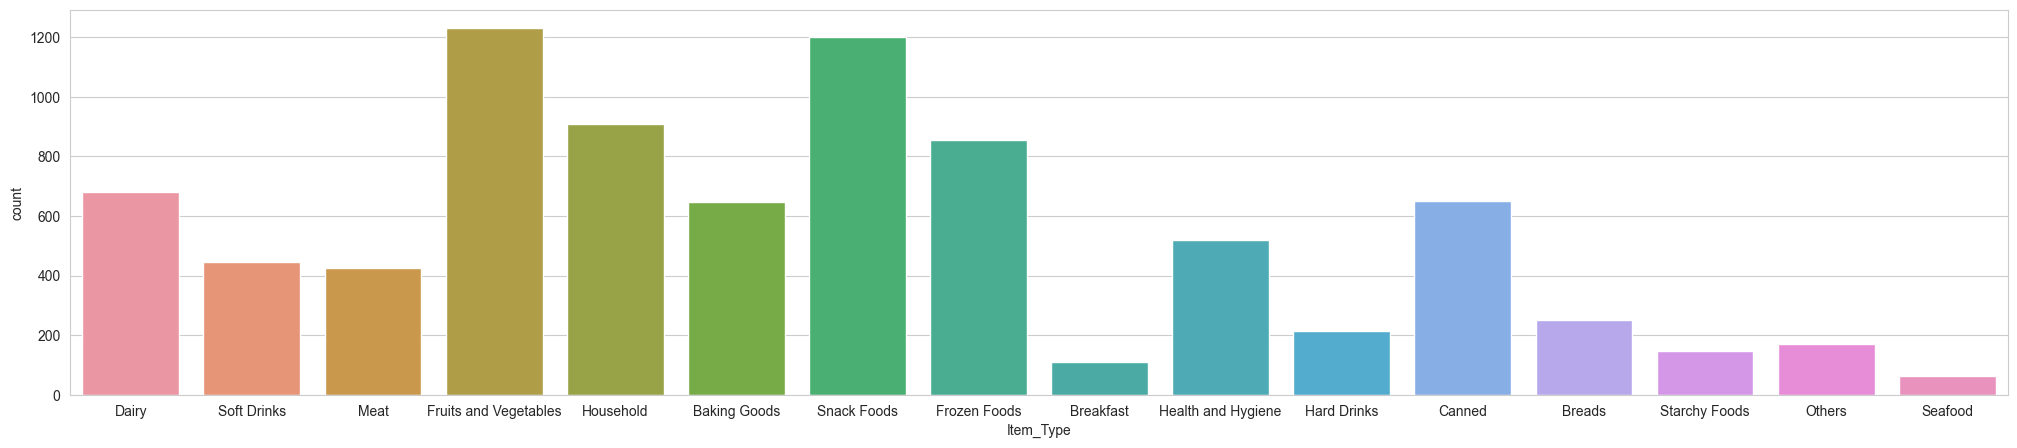

In [16]:
py.figure(figsize=(25,5))
sb.countplot(x=train_set.Item_Type)

<AxesSubplot: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

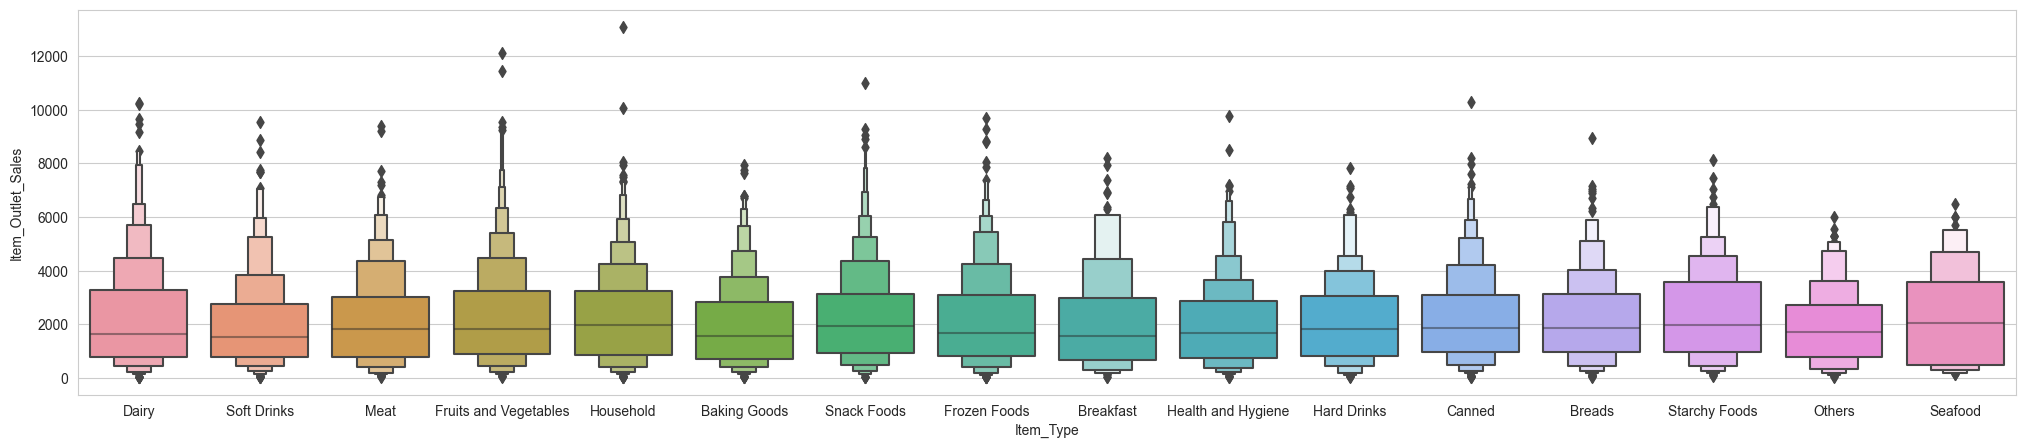

In [57]:
py.figure(figsize=(25,5))
sb.boxenplot(x=train_set.Item_Type, y=target)

<AxesSubplot: xlabel='Item_MRP', ylabel='Density'>

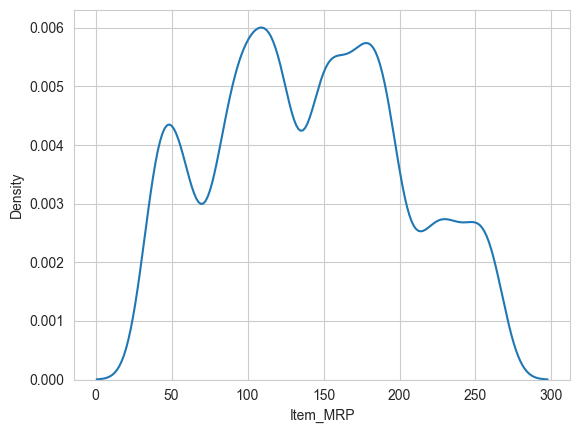

In [59]:
sb.kdeplot(x=train_set.Item_MRP)

<AxesSubplot: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

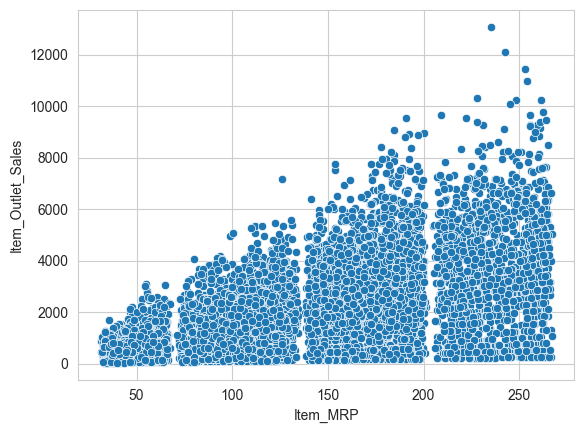

In [60]:
sb.scatterplot(x=train_set.Item_MRP, y=target)

In [18]:
mrp = train_set.Item_MRP.copy()

In [19]:
mrp.describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [20]:
mrp[mrp <= 94] = 0
mrp[(mrp > 94) & (mrp <= 143)] = 1
mrp[(mrp > 143) & (mrp <= 186)] = 2
mrp[(mrp > 186)] = 3

<AxesSubplot: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

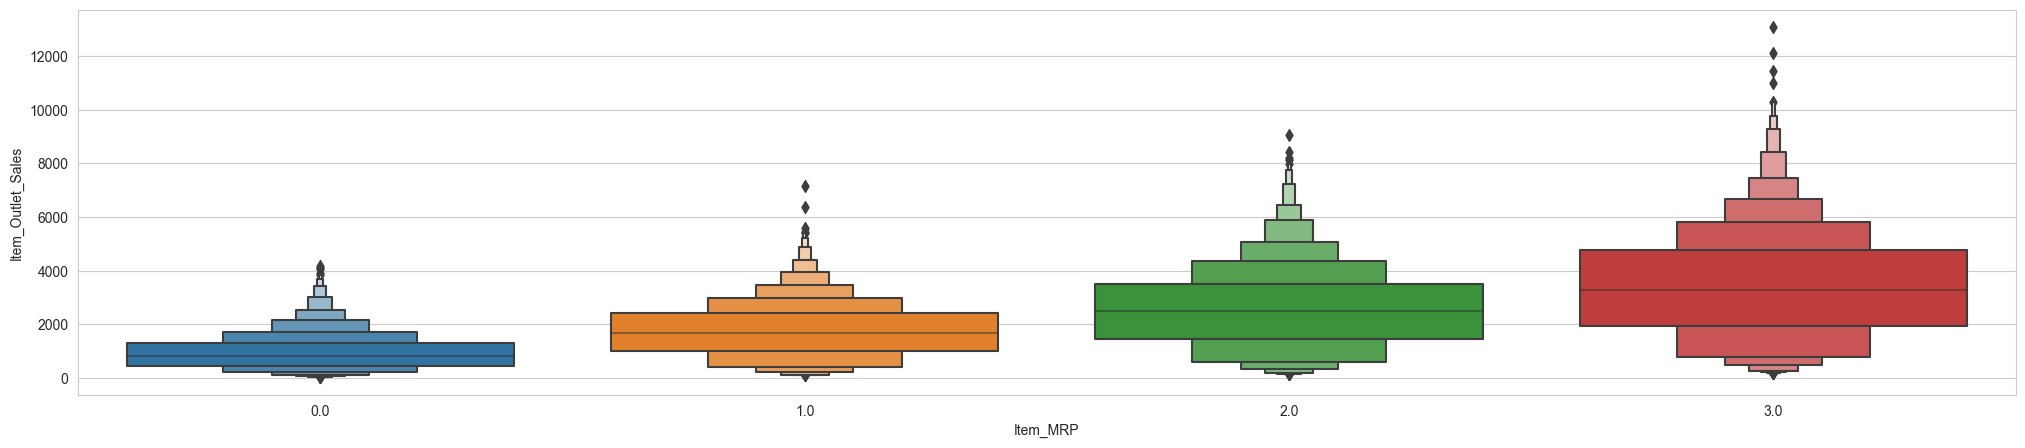

In [21]:
py.figure(figsize=(25,5))
sb.boxenplot(x=mrp, y=target)

<AxesSubplot: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

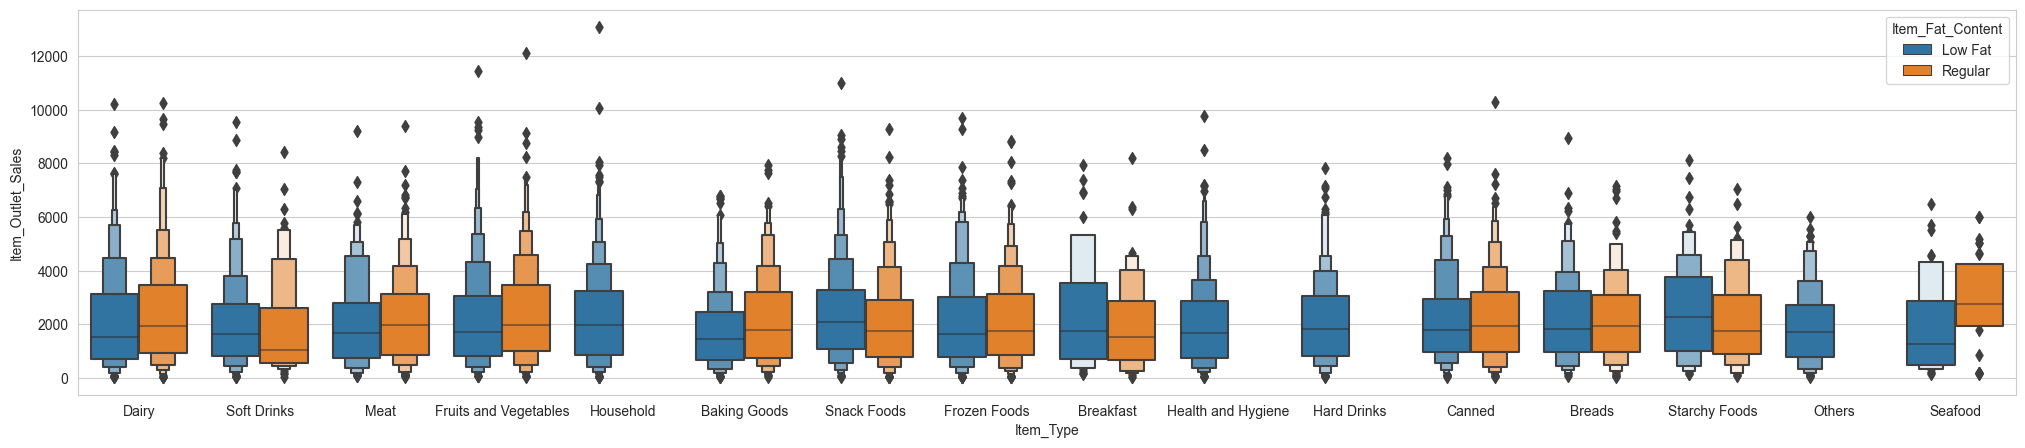

In [22]:
py.figure(figsize=(25,5))
sb.boxenplot(x=train_set.Item_Type, y=target, hue=train_set.Item_Fat_Content)

<AxesSubplot: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

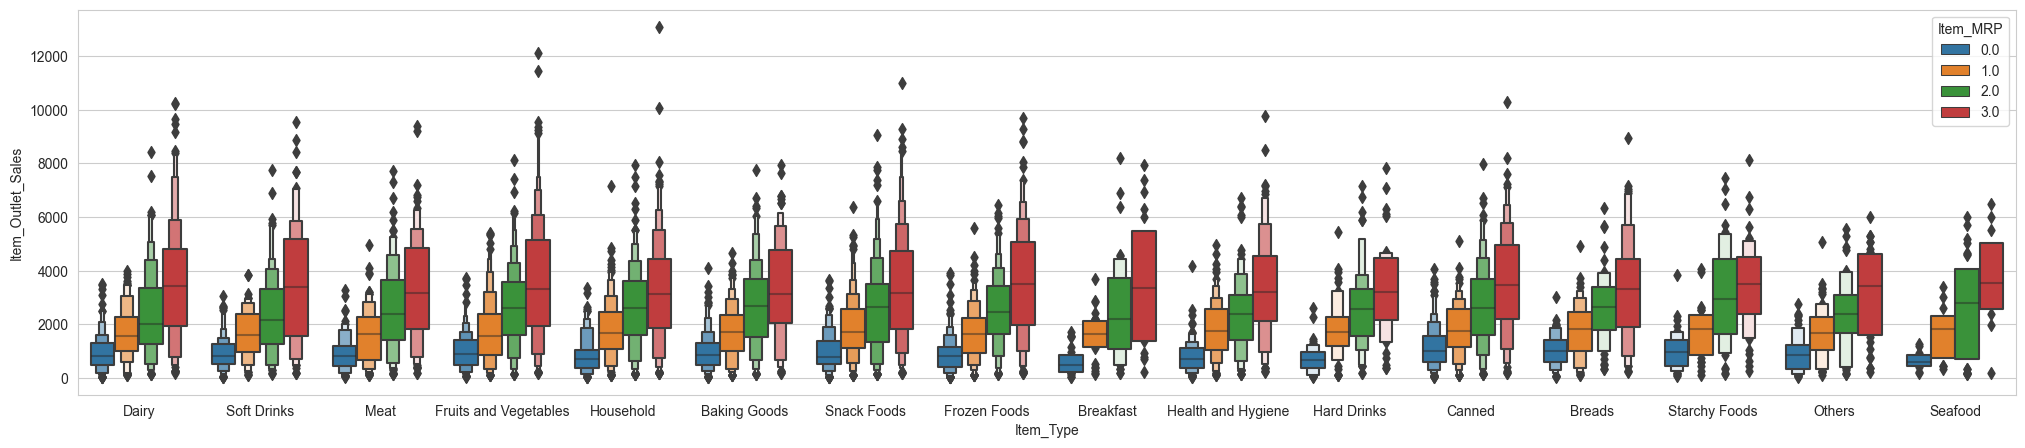

In [23]:
py.figure(figsize=(25,5))
sb.boxenplot(x=train_set.Item_Type, y=target, hue=mrp)

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

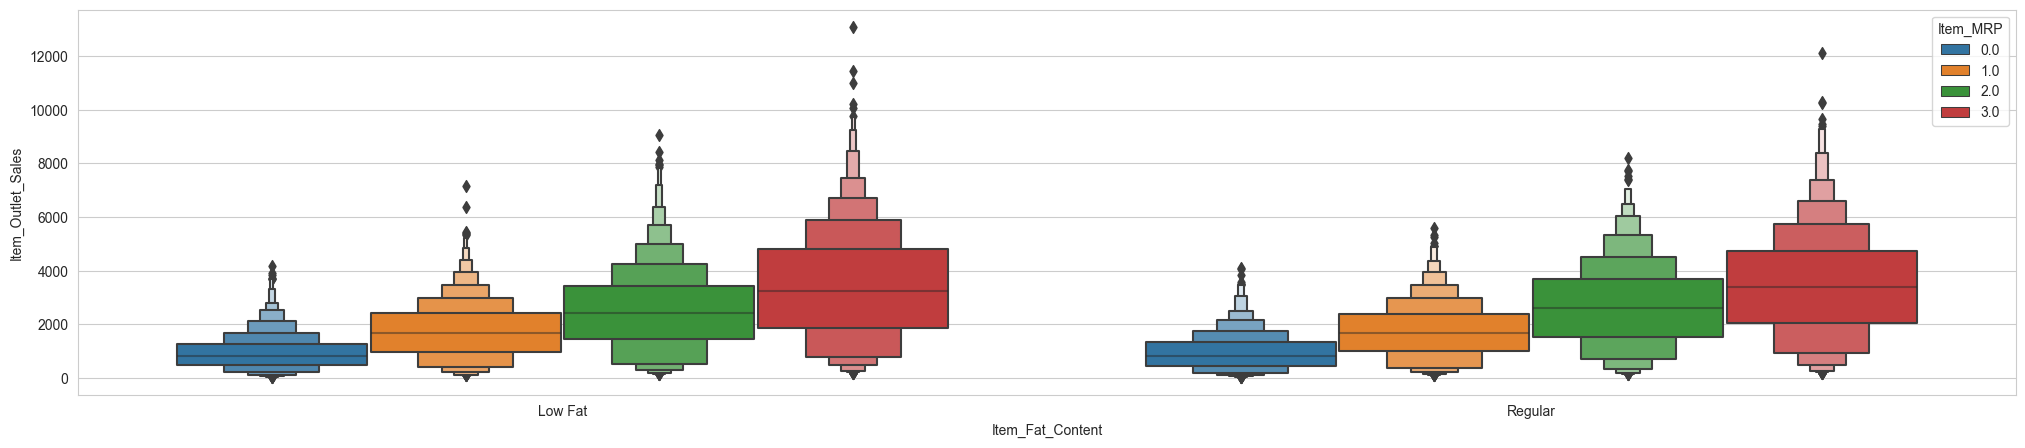

In [89]:
py.figure(figsize=(25,5))
sb.boxenplot(x=train_set.Item_Fat_Content, y=target, hue=mrp)

<AxesSubplot: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

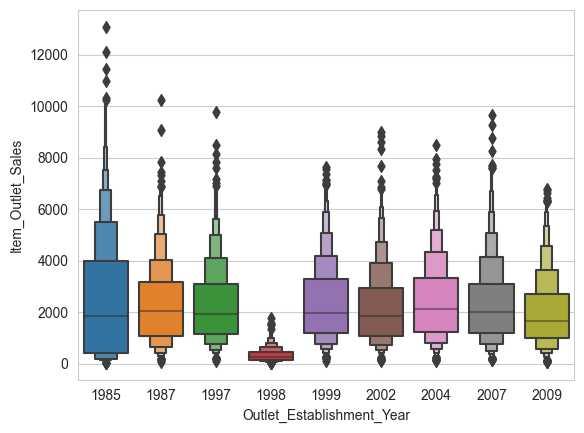

In [95]:
sb.boxenplot(x=train_set.Outlet_Establishment_Year, y=target)


<AxesSubplot: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

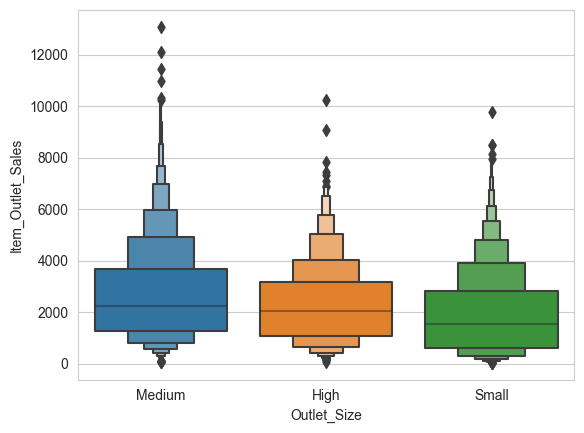

In [94]:
sb.boxenplot(x=train_set.Outlet_Size, y=target)

<AxesSubplot: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

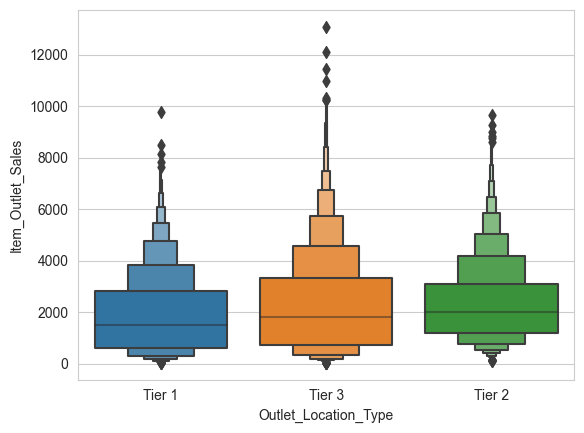

In [98]:
sb.boxenplot(x=train_set.Outlet_Location_Type, y=target)

<AxesSubplot: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

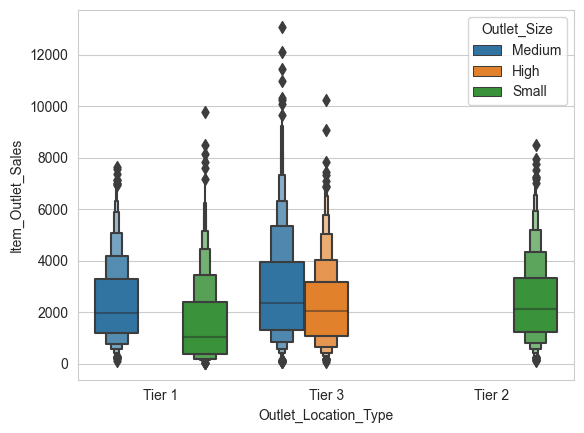

In [20]:
sb.boxenplot(x=train_set.Outlet_Location_Type, y=target, hue=train_set.Outlet_Size)

<AxesSubplot: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

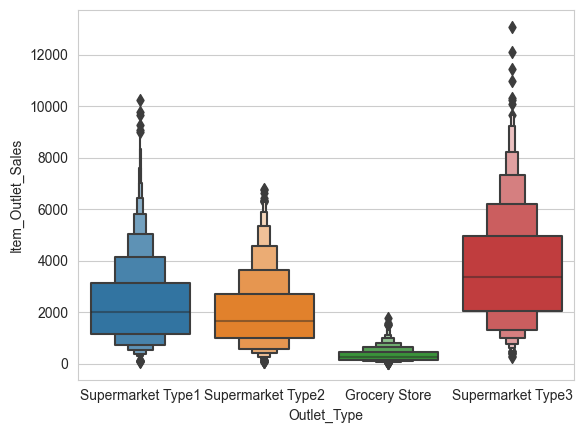

In [99]:
sb.boxenplot(x=train_set.Outlet_Type, y=target)

<AxesSubplot: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

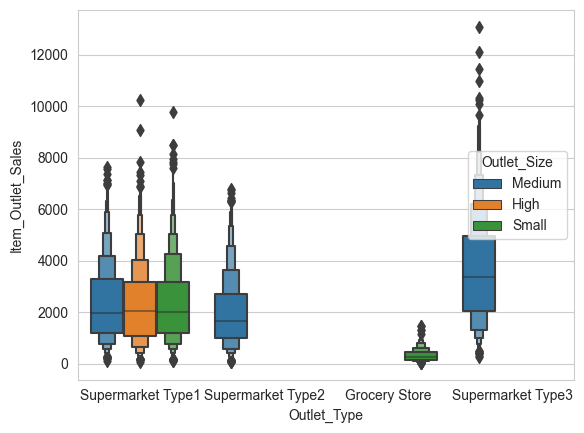

In [103]:
sb.boxenplot(x=train_set.Outlet_Type, y=target, hue=train_set.Outlet_Size)

<AxesSubplot: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

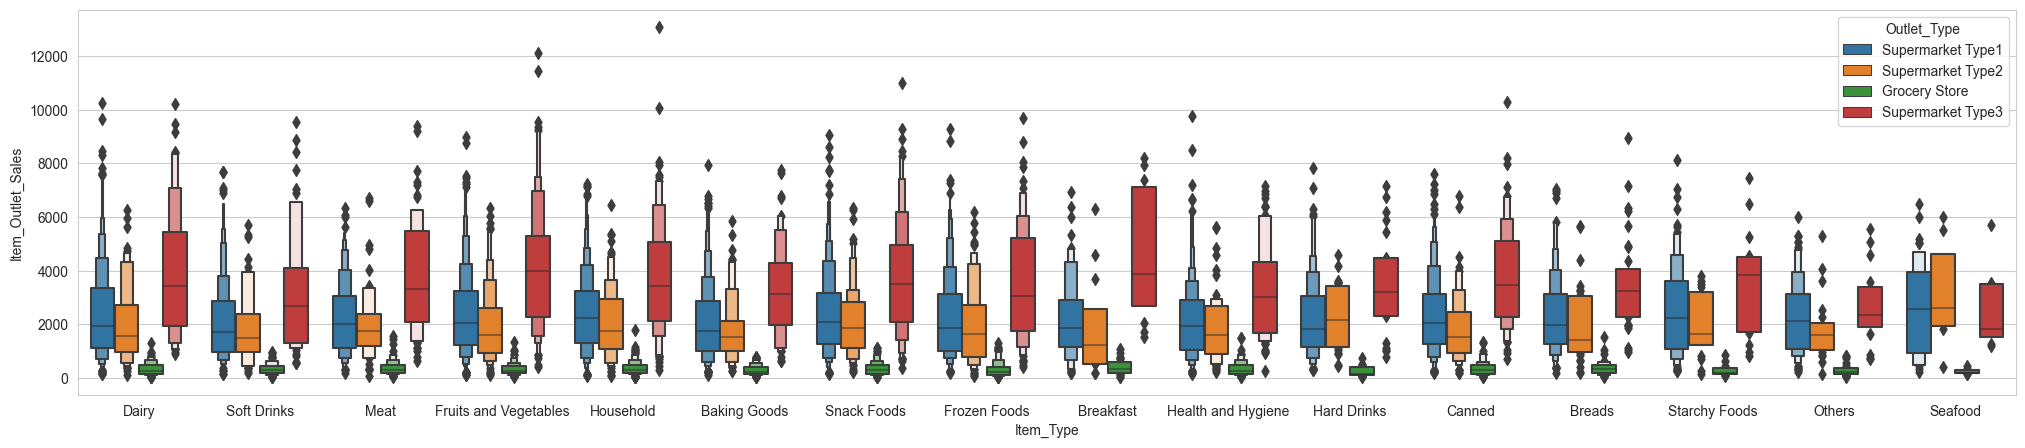

In [106]:
py.figure(figsize=(25, 5))
sb.boxenplot(x=train_set.Item_Type, y=target, hue=train_set.Outlet_Type)


In [23]:
features_drop = ['Item_Identifier', 'Outlet_Identifier', 'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year']
train_set.drop(features_drop, axis=1, inplace=True)

In [30]:
train_set.Outlet_Size[train_set.Outlet_Type == 'Supermarket Type3'] = 'Medium'
train_set.Outlet_Size[train_set.Outlet_Type == 'Grocery Store'] = 'Small'
train_set.Outlet_Size[train_set.Outlet_Location_Type == 'Tier 2'] = 'Small'


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [31]:
train_set.isnull().sum()

Item_Fat_Content        0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [57]:
train_set.Item_Fat_Content.replace(['Low Fat', 'Regular'], [0,1], inplace=True)
train_set.Outlet_Size.replace(['Medium', 'Small', 'High'], [1,0,2], inplace=True)
train_set = pd.get_dummies(data=train_set, columns=['Outlet_Type', 'Item_Type', 'Outlet_Location_Type'], drop_first=True)

<AxesSubplot: >

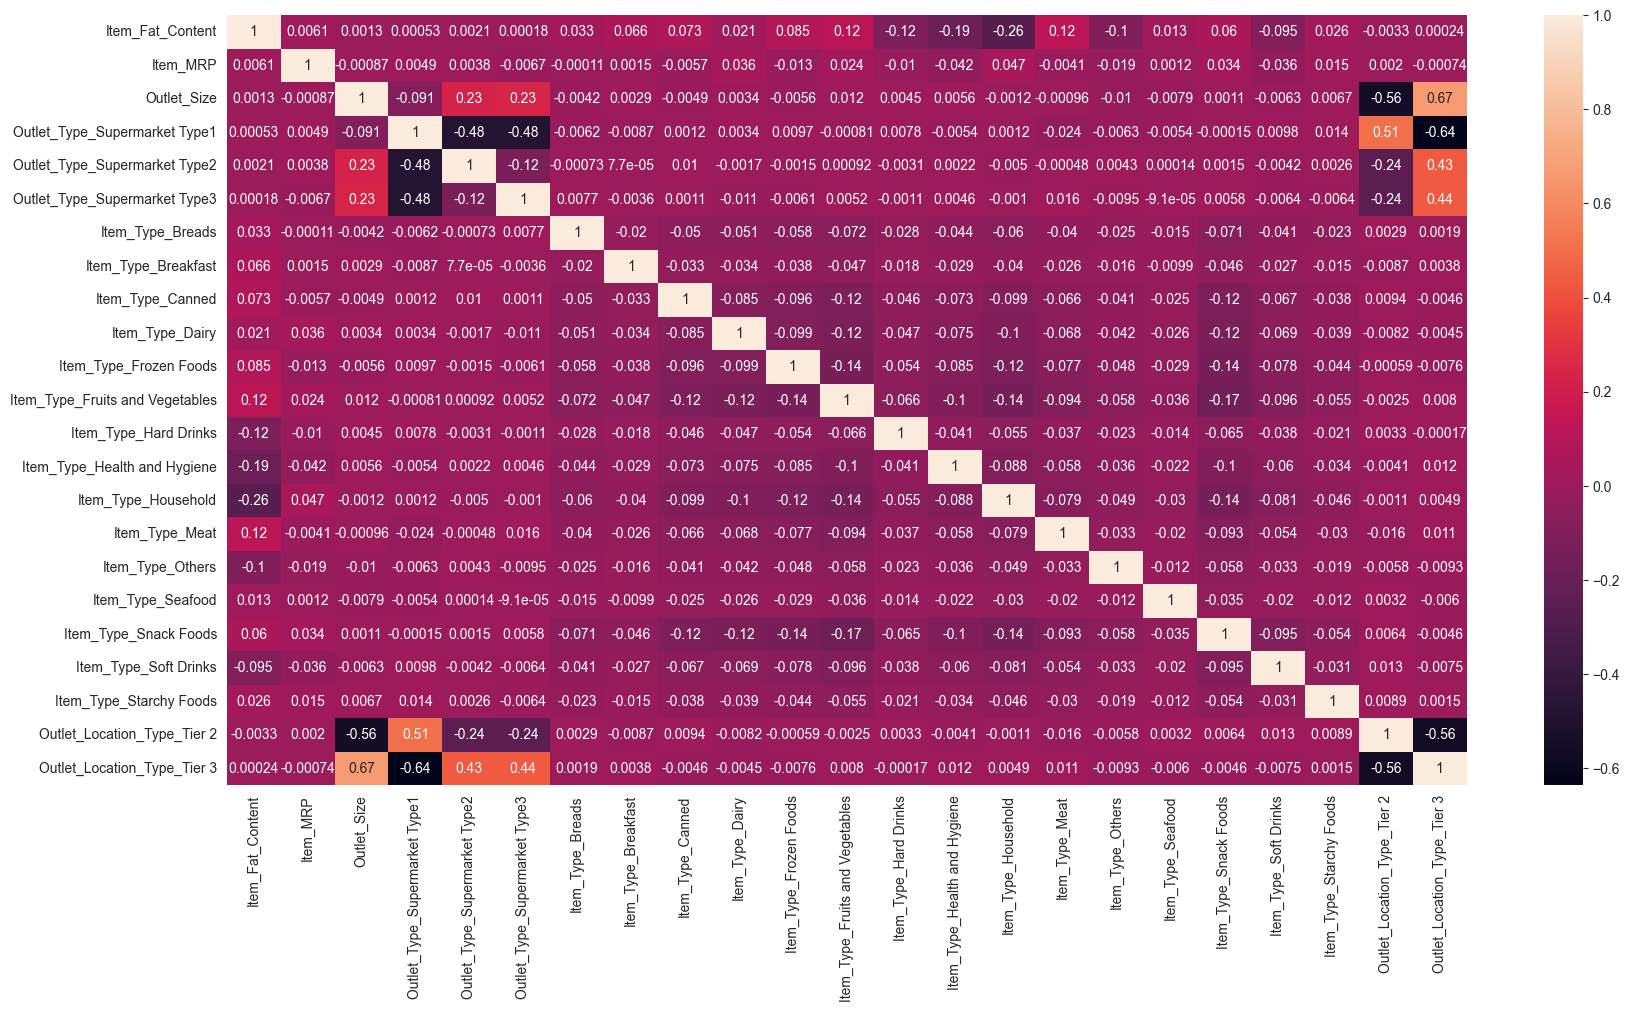

In [61]:
py.figure(figsize=(20, 10))
sb.heatmap(train_set.corr(), annot=True)

In [65]:
train_x, test_x, train_y, test_y = train_test_split(train_set, target, train_size=0.80, random_state=48)

In [66]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [67]:
pca = PCA()
pca.fit(train_x)

PCA()

In [70]:
pca.explained_variance_ratio_ * 100

array([13.07764841,  6.39498531,  5.08027225,  5.02930913,  4.92013879,
        4.84531727,  4.78949246,  4.75735651,  4.61648236,  4.59061843,
        4.52520668,  4.49212797,  4.47101365,  4.43793351,  4.42451528,
        4.41110428,  4.30760038,  4.10001381,  2.68183841,  2.31362359,
        1.06470387,  0.35523342,  0.31346425])

In [71]:
train_dim = pca.transform(train_x)
test_dim = pca.transform(test_x)

In [79]:
def train(model, params, x_train=train_set, y_train=target):
    model = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=KFold(), return_train_score=True)
    model.fit(x_train, y_train)
    return model

In [77]:
lr_model =  LinearRegression()
lr_model.fit(train_dim, train_y)
print(r2_score(train_y, lr_model.predict(train_dim)))
print(r2_score(test_y, lr_model.predict(test_dim)))

0.5628017162720015
0.5601938842508185


In [81]:
lasso, params =  Lasso(), {'alpha': [0.01, 0.1, 0.00, 1, 0.0001]}
lasso_model = train(lasso, params)
lasso_model.best_score_, lasso_model.best_params_

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Coordinate descent with no regularization may lead to unexpected results and is discouraged.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.300e+09, tolerance: 1.955e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Coordinate descent with no regularization may lead to unexpected results and is discouraged.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.354e+09, tolerance: 2.002e+06 Linear regression mod

(0.559442678439975, {'alpha': 1})

In [84]:
lasso_model = Lasso(alpha= 1.0)
lasso_model.fit(train_dim, train_y)
print(r2_score(train_y, lasso_model.predict(train_dim)))
print(r2_score(test_y, lasso_model.predict(test_dim)))


0.5627841911199883
0.5601777941369666


In [89]:
ridge, params =  Ridge(), {'alpha': [0.01, 0.1, 0.00, 1, 0.0001]}
ridge_model = train(ridge, params)
ridge_model.best_score_, ridge_model.best_params_

(0.5583597936439203, {'alpha': 1})

In [90]:
ridge_model = Ridge(alpha= 1.0)
ridge_model.fit(train_dim, train_y)
print(r2_score(train_y, ridge_model.predict(train_dim)))
print(r2_score(test_y, ridge_model.predict(test_dim)))

0.5628016102298261
0.560180953475466


In [87]:
xg, params =  XGBRegressor(), {'n_estimators': [300, 400, 500, 600, 700]}
xg_model = train(xg, params)
xg_model.best_score_, xg_model.best_params_

(0.4571821861087044, {'n_estimators': 300})

In [88]:
xg_model = XGBRegressor(n_estimators= 300)
xg_model.fit(train_dim, train_y)
print(r2_score(train_y, xg_model.predict(train_dim)))
print(r2_score(test_y, xg_model.predict(test_dim)))


0.922735561921481
0.46567093924241254


In [91]:
rf, params = RandomForestRegressor(), {'n_estimators': [300, 400, 500, 600, 700]}
rf_model = train(rf, params)
rf_model.best_score_, rf_model.best_params_

(0.5109937502947066, {'n_estimators': 600})

In [92]:
rf_model = XGBRegressor(n_estimators=600)
rf_model.fit(train_dim, train_y)
print(r2_score(train_y, rf_model.predict(train_dim)))
print(r2_score(test_y, rf_model.predict(test_dim)))


0.9709003875778663
0.4181365218131373
